$$\Huge{\text{SVD Image Compression
}}$$

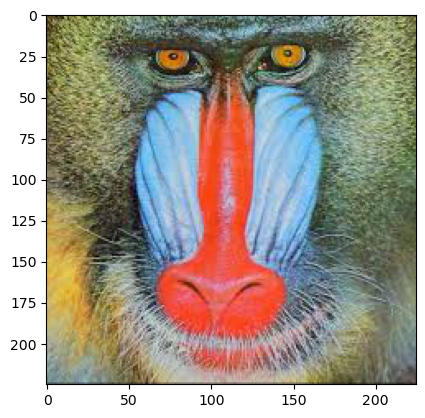

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
img = Image.open('images.jpg')
plt.imshow(img);

<font size =4> Lets Change the image into a matrix and convert it to grayscale.

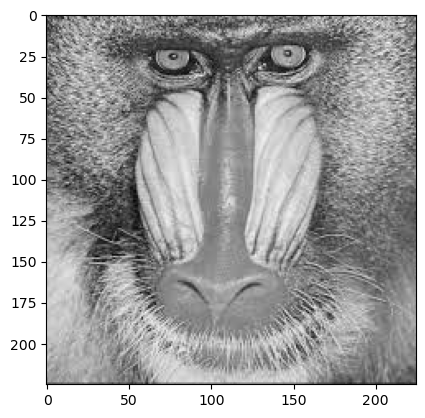

In [6]:
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.imshow(imgmat, cmap='gray');

<font size=4>  Let's look at the number of pixels.

In [7]:
imgmat.shape

(225, 225)

In [8]:
225**2

50625

In [9]:
imgmat

matrix([[101.,  84.,  85., ...,  83., 114., 145.],
        [ 84.,  56.,  99., ..., 110.,  89.,  67.],
        [105., 100.,  67., ...,  98.,  96., 159.],
        ...,
        [109., 142., 146., ...,  93., 101.,  81.],
        [120., 150., 141., ...,  91., 107.,  90.],
        [ 98.,  84.,  87., ...,  50.,  55.,  52.]], shape=(225, 225))

<font size =4> Now let's do a Singular Value Decomposition 
    
**Singular Value decomposition**

Not all matrices are square but eigenvalues still play a roll.  For any matrix $M_{m \times n}$ the eigenvalues of $M^TM$ are important. First we know that they are all $\ge 0$ and most importantly the yield a decomposition of the matrix

$$ M_{m \times n}= U_{m \times m}S_{m \times n}V_{n \times n}^T$$ 

where S is a non square diagonal matrix (a matrix where the only non zero entries are on the diagonal) and the diagonal is the square roots of the eigenvalues of $MM^T$.  We also now that $U$ and $V$ are orthogonal matrices, that means $UU^T=I_{ m\times m}$ and $VV^T=I_{n \times n}$. [Numpy SVD](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html) Notice it retruns $V^T$    

In [10]:
U, sigma, VT = np.linalg.svd(imgmat)
U.shape, sigma.shape,VT.shape

((225, 225), (225,), (225, 225))

<font size =4> Here we are going to greatly reduce not only the size of S but of U and VT as well. Change the value of i for different compression sizes.

In [11]:
i=20
U2,sigma2,VT2 = np.matrix(U[:, :i]) , sigma[:i] , np.matrix(VT[:i, :])
U2.shape,sigma2.shape, VT2.shape

((225, 20), (20,), (20, 225))

Reconstruction


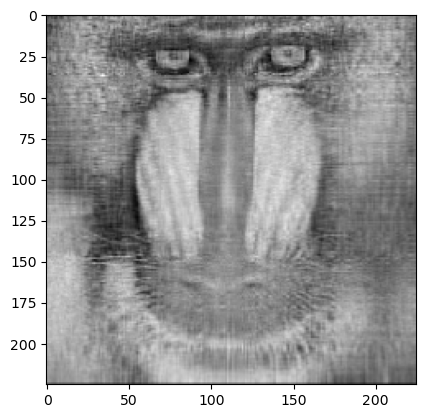

Original


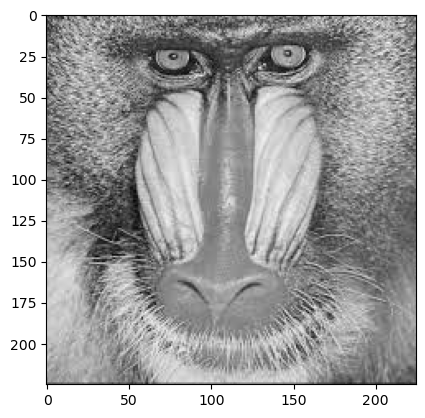

In [12]:
Reconst=U2*np.diag(sigma2)*VT2
print('Reconstruction')
plt.imshow(Reconst, cmap='gray')
plt.show()
print('Original')
plt.imshow(imgmat, cmap='gray');

In [13]:
print("We used",100*(225*2*i+i)/225**2,"% of the data in the reconstuction")

We used 17.817283950617284 % of the data in the reconstuction


In [17]:
(225*2*i+i), 225**2

(9020, 50625)